In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, ttest_ind

In [4]:
# !pip3 install seaborn

In [10]:
pre_df = pd.read_excel("TeamSmile Pre-Event Survey.xlsx")

In [11]:
post_df =pd.read_excel("TeamSmile Post-Event Survey.xlsx")

In [8]:
# pip install openpyxl


In [43]:
# pip install openpyxl
l1,l2 =[],[]
for cols in pre_df.columns:
    l1.append(cols)
for c in post_df.columns:
    l2.append(c)

In [45]:
l2

['Respondent ID',
 'Collector ID',
 'Start Date',
 'End Date',
 'IP Address',
 'Email Address',
 'Which TeamSmile event are you attending?',
 'Did this event provide you with new exposure to treating children with Intellectual and Developmental Disabilities (IDD)?',
 'How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?',
 'How confident do you feel in managing children with IDD in a clinical setting after participating in TeamSmile?',
 'How prepared do you now feel to interact with children with disabilities in your clinical training or practice?',
 'What specific skills or insights did you gain from participating in this event?',
 'How often do you think you will incorporate a person-centered approach to care (focusing on the patient’s preferences, needs, and values) in your practice after this event?',
 'After this event, how well do you understand how the biopsychosocial model of care (biol

# Drop the first metadata row and empty rows
pre = pre_df.drop(0).reset_index(drop=True).dropna(how="all")
post = post_df.drop(0).reset_index(drop=True).dropna(how="all")


def run_analyses(self):
        """Run all analyses with TeamSmile-specific focus"""
        print("Generating demographic analysis...")
        self.demographic_analysis()
        
        print("Analyzing comfort and confidence levels...")
        self.comfort_confidence_analysis()
        
        print("Analyzing knowledge and skills...")
        self.knowledge_skills_analysis()
        
        print("Comparing pre-post responses...")
        self.pre_post_comparison()
        
        print("Analyzing interprofessional collaboration...")
        self.interprofessional_collaboration_analysis()
        
        print("Analyzing post-event outcomes...")
        self.post_event_outcomes()
        
        print("Running TeamSmile-specific analysis...")
        self.teamsmile_specific_analysis()
        
        print("Performing statistical analysis...")
        self.statistical_analysis()
        
        print("Generating summary report...")
        self.generate_summary_report()
        
    def event_comparison_analysis(self):
        """Compare outcomes between Buffalo and Pittsburgh events"""
        if 'Which TeamSmile event are you attending?' not in self.post_data.columns:
            print("Cannot perform event comparison - event location data not available")
            return
            
        print("=== BUFFALO VS PITTSBURGH COMPARISON ===\n")
        
        # Key outcome questions for comparison
        comparison_questions = [
            'Did this event provide you with new exposure to treating children with Intellectual and Developmental Disabilities (IDD)?',
            'How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?',
            'How confident do you feel in managing children with IDD in a clinical setting after participating in TeamSmile?',
            'How prepared do you now feel to interact with children with disabilities in your clinical training or practice?'
        ]
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.ravel()
        
        for i, question in enumerate(comparison_questions):
            if question in self.post_data.columns and i < 4:
                # Create crosstab
                crosstab = pd.crosstab(
                    self.post_data['Which TeamSmile event are you attending?'],
                    self.post_data[question],
                    normalize='index'  # Normalize by row (event)
                ) * 100  # Convert to percentages
                
                crosstab.plot(kind='bar', ax=axes[i], width=0.8)
                axes[i].set_title(f'{question[:50]}...')
                axes[i].set_ylabel('Percentage')
                axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
                axes[i].set_xticklabels(crosstab.index, rotation=45)
        
        plt.tight_layout()
        plt.show()
        
    def profession_comparison_analysis(self):
        """Compare outcomes between different professions"""
        if 'What is your profession?' not in self.pre_data.columns:
            print("Cannot perform profession comparison - profession data not available")
            return
            
        print("=== PROFESSION-BASED OUTCOME COMPARISON ===\n")
        
        # If we have merged data, use profession from pre-survey
        if self.merged_data is not None:
            prof_col = 'What is your profession?_pre'
            data_to_use = self.merged_data
        else:
            print("Need merged data for profession comparison with post-event outcomes")
            return
            
        comparison_questions = [
            'How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?_post',
            'How confident do you feel in managing children with IDD in a clinical setting after participating in TeamSmile?_post'
        ]
        
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        for i, question in enumerate(comparison_questions):
            if question in data_to_use.columns and prof_col in data_to_use.columns:
                # Convert responses to numeric
                numeric_scores = []
                professions = []
                
                for idx, row in data_to_use.iterrows():
                    score = self.likert_mapping.get(row[question], np.nan)
                    if not np.isnan(score):
                        numeric_scores.append(score)
                        professions.append(row[prof_col])
                
                if numeric_scores:
                    score_df = pd.DataFrame({
                        'Score': numeric_scores,
                        'Profession': professions
                    })
                    
                    # Box plot by profession
                    score_df.boxplot(column='Score', by='Profession', ax=axes[i])
                    axes[i].set_title(f'{question.replace("_post", "")[:40]}...')
                    axes[i].set_ylabel('Score')
                    axes[i].set_xlabel('Profession')
        
        plt.tight_layout()
        plt.show()import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, fisher_exact, wilcoxon, mannwhitneyu
from scipy.stats import ttest_rel, ttest_ind
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class TeamSmileAnalyzer:
    def __init__(self):
        self.pre_data = None
        self.post_data = None
        self.merged_data = None
        
    def load_data(self, pre_event_path, post_event_path):
        """Load pre and post event survey data"""
        self.pre_data = pd.read_csv(pre_event_path)
        self.post_data = pd.read_csv(post_event_path)
        print(f"Pre-event data shape: {self.pre_data.shape}")
        print(f"Post-event data shape: {self.post_data.shape}")
        
    def clean_data(self):
        """Clean and prepare data for analysis"""
        # Remove unnamed columns and clean column names
        def clean_columns(df):
            df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
            df.columns = df.columns.str.strip()
            return df
        
        self.pre_data = clean_columns(self.pre_data)
        self.post_data = clean_columns(self.post_data)
        
        # Create mapping for specific TeamSmile questions
        self.likert_mapping = {
            # Post-event comfort comparison (Q4)
            'Much less comfortable': 1, 'Slightly less comfortable': 2, 
            'About the same as before': 3, 'Somewhat more comfortable': 4, 
            'Much more comfortable': 5,
            
            # Confidence levels (Q5)
            'Not confident at all': 1, 'Slightly confident': 2, 'Neutral': 3,
            'Somewhat confident': 4, 'Very confident': 5,
            
            # Preparedness levels (Q6)
            'Not at all prepared': 1, 'Slightly prepared': 2, 'Somewhat prepared': 3,
            'Very prepared': 4, 'Extremely prepared': 5,
            
            # Standard pre-event scales
            'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4, 'Always': 5,
            'Not at all': 1, 'Slightly': 2, 'Moderately': 3, 'Very': 4, 'Extremely': 5,
            'Not comfortable': 1, 'Slightly comfortable': 2, 'Moderately comfortable': 3, 
            'Very comfortable': 4, 'Extremely comfortable': 5,
            'Poor': 1, 'Fair': 2, 'Good': 3, 'Very good': 4, 'Excellent': 5,
            'Not familiar': 1, 'Slightly familiar': 2, 'Moderately familiar': 3,
            'Very familiar': 4, 'Extremely familiar': 5
        }
        
    def merge_data(self):
        """Merge pre and post data based on respondent ID or email"""
        # Try to merge on Respondent ID first, then email if available
        if 'Respondent ID' in self.pre_data.columns and 'Respondent ID' in self.post_data.columns:
            self.merged_data = pd.merge(self.pre_data, self.post_data, 
                                      on='Respondent ID', suffixes=('_pre', '_post'))
        else:
            print("Warning: Cannot merge data - no common identifier found")
            
    def demographic_analysis(self):
        """Analyze demographics and create visualizations"""
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        # Event location distribution
        if 'Which TeamSmile event are you attending?' in self.pre_data.columns:
            event_counts = self.pre_data['Which TeamSmile event are you attending?'].value_counts()
            axes[0,0].pie(event_counts.values, labels=event_counts.index, autopct='%1.1f%%')
            axes[0,0].set_title('Event Location Distribution')
        
        # Age group distribution
        if 'What is your age group?' in self.pre_data.columns:
            age_counts = self.pre_data['What is your age group?'].value_counts()
            axes[0,1].bar(range(len(age_counts)), age_counts.values)
            axes[0,1].set_xticks(range(len(age_counts)))
            axes[0,1].set_xticklabels(age_counts.index, rotation=45)
            axes[0,1].set_title('Age Group Distribution')
            axes[0,1].set_ylabel('Count')
        
        # Profession distribution
        if 'What is your profession?' in self.pre_data.columns:
            prof_counts = self.pre_data['What is your profession?'].value_counts()
            axes[0,2].bar(range(len(prof_counts)), prof_counts.values)
            axes[0,2].set_xticks(range(len(prof_counts)))
            axes[0,2].set_xticklabels(prof_counts.index, rotation=45)
            axes[0,2].set_title('Profession Distribution')
            axes[0,2].set_ylabel('Count')
        
        # Training level
        if 'What is your current level of training?' in self.pre_data.columns:
            training_counts = self.pre_data['What is your current level of training?'].value_counts()
            axes[1,0].pie(training_counts.values, labels=training_counts.index, autopct='%1.1f%%')
            axes[1,0].set_title('Training Level Distribution')
        
        # Prior IDD training
        if 'Have you received any formal training in treating children with Intellectual and Developmental Disabilities (IDD)?' in self.pre_data.columns:
            idd_training = self.pre_data['Have you received any formal training in treating children with Intellectual and Developmental Disabilities (IDD)?'].value_counts()
            axes[1,1].bar(idd_training.index, idd_training.values)
            axes[1,1].set_title('Prior IDD Training')
            axes[1,1].set_ylabel('Count')
        
        # TeamSmile participation history
        if 'How many times have you participated in a TeamSmile event?' in self.pre_data.columns:
            participation = self.pre_data['How many times have you participated in a TeamSmile event?'].value_counts()
            axes[1,2].bar(range(len(participation)), participation.values)
            axes[1,2].set_xticks(range(len(participation)))
            axes[1,2].set_xticklabels(participation.index, rotation=45)
            axes[1,2].set_title('TeamSmile Participation History')
            axes[1,2].set_ylabel('Count')
        
        plt.tight_layout()
        plt.show()
        
    def comfort_confidence_analysis(self):
        """Analyze comfort and confidence levels pre/post"""
        comfort_questions = [
            'How comfortable are you in providing care for patients with special healthcare needs (SHCN), including IDD?',
            'How prepared do you feel to collaborate with other healthcare professionals (e.g., occupational therapists, dentists, physicians) to provide care for children with IDD?'
        ]
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        for i, question in enumerate(comfort_questions):
            if question in self.pre_data.columns:
                # Pre-event distribution
                pre_counts = self.pre_data[question].value_counts()
                axes[i,0].bar(range(len(pre_counts)), pre_counts.values)
                axes[i,0].set_xticks(range(len(pre_counts)))
                axes[i,0].set_xticklabels(pre_counts.index, rotation=45)
                axes[i,0].set_title(f'Pre-Event: {question[:50]}...')
                axes[i,0].set_ylabel('Count')
                
                # Create box plot for numerical analysis
                pre_numeric = pd.Series([self.likert_mapping.get(val, np.nan) for val in self.pre_data[question]])
                axes[i,1].boxplot(pre_numeric.dropna())
                axes[i,1].set_title(f'Pre-Event Distribution (Numeric)')
                axes[i,1].set_ylabel('Likert Score')
        
        plt.tight_layout()
        plt.show()
        
    def knowledge_skills_analysis(self):
        """Analyze knowledge and skills questions"""
        knowledge_questions = [
            'How well do you understand how the biopsychosocial model of care (biological, psychological, and social factors) influences patient outcomes in your practice?',
            'How familiar are you with structured communication frameworks such as SBAR (Situation, Background, Assessment, Recommendation)?',
            'How familiar are you with occupational therapy (OT) interventions used for patients with intellectual and developmental disabilities (IDD) during dental appointments to provide holistic care?',
            'How familiar are you with interprofessional collaboration (IPC) in healthcare and the roles of different professionals involved in patient care?'
        ]
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.ravel()
        
        for i, question in enumerate(knowledge_questions):
            if question in self.pre_data.columns and i < 4:
                knowledge_counts = self.pre_data[question].value_counts()
                axes[i].pie(knowledge_counts.values, labels=knowledge_counts.index, autopct='%1.1f%%')
                axes[i].set_title(f'{question[:40]}...')
        
        plt.tight_layout()
        plt.show()
        
    def pre_post_comparison(self):
        """Compare pre and post event responses"""
        if self.merged_data is None:
            print("Cannot perform pre-post comparison without merged data")
            return
            
        # Identify comparable questions
        comparable_questions = [
            ('How comfortable are you in providing care for patients with special healthcare needs (SHCN), including IDD?',
             'How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?'),
            ('How well do you understand how the biopsychosocial model of care (biological, psychological, and social factors) influences patient outcomes in your practice?',
             'After this event, how well do you understand how the biopsychosocial model of care (biological, psychological, and social factors) can influence patient outcomes?')
        ]
        
        fig, axes = plt.subplots(len(comparable_questions), 2, figsize=(16, 8*len(comparable_questions)))
        
        for i, (pre_q, post_q) in enumerate(comparable_questions):
            pre_col = pre_q + '_pre'
            post_col = post_q + '_post'
            
            if pre_col in self.merged_data.columns and post_col in self.merged_data.columns:
                # Convert to numeric
                pre_numeric = pd.Series([self.likert_mapping.get(val, np.nan) for val in self.merged_data[pre_col]])
                post_numeric = pd.Series([self.likert_mapping.get(val, np.nan) for val in self.merged_data[post_col]])
                
                # Box plots
                data_to_plot = [pre_numeric.dropna(), post_numeric.dropna()]
                axes[i,0].boxplot(data_to_plot, labels=['Pre', 'Post'])
                axes[i,0].set_title(f'Pre vs Post: {pre_q[:40]}...')
                axes[i,0].set_ylabel('Likert Score')
                
                # Paired differences
                valid_pairs = ~(pre_numeric.isna() | post_numeric.isna())
                differences = post_numeric[valid_pairs] - pre_numeric[valid_pairs]
                axes[i,1].hist(differences, bins=np.arange(-4.5, 5.5, 1), alpha=0.7)
                axes[i,1].axvline(differences.mean(), color='red', linestyle='--', label=f'Mean: {differences.mean():.2f}')
                axes[i,1].set_title(f'Difference (Post - Pre)')
                axes[i,1].set_xlabel('Score Change')
                axes[i,1].set_ylabel('Frequency')
                axes[i,1].legend()
        
        plt.tight_layout()
        plt.show()
        
    def interprofessional_collaboration_analysis(self):
        """Analyze interprofessional collaboration aspects"""
        ipc_questions = [
            'How prepared do you feel to collaborate with other healthcare professionals (e.g., occupational therapists, dentists, physicians) to provide care for children with IDD?',
            'How often do you collaborate with other healthcare providers (e.g., occupational therapists, dentists, physicians) to support patients with special healthcare needs?',
            'How important is it for you to establish trust with other healthcare providers to provide high-quality care for patients?'
        ]
        
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        
        for i, question in enumerate(ipc_questions):
            if question in self.pre_data.columns:
                collab_counts = self.pre_data[question].value_counts()
                axes[i].bar(range(len(collab_counts)), collab_counts.values, color=plt.cm.Set3(np.arange(len(collab_counts))))
                axes[i].set_xticks(range(len(collab_counts)))
                axes[i].set_xticklabels(collab_counts.index, rotation=45, ha='right')
                axes[i].set_title(f'{question[:30]}...')
                axes[i].set_ylabel('Count')
        
        plt.tight_layout()
        plt.show()
        
    def post_event_outcomes(self):
        """Analyze post-event specific outcomes with TeamSmile-specific questions"""
        # Create comprehensive post-event analysis
        fig = plt.figure(figsize=(20, 16))
        
        # Q3: New exposure to IDD treatment
        plt.subplot(3, 3, 1)
        if 'Did this event provide you with new exposure to treating children with Intellectual and Developmental Disabilities (IDD)?' in self.post_data.columns:
            exposure_counts = self.post_data['Did this event provide you with new exposure to treating children with Intellectual and Developmental Disabilities (IDD)?'].value_counts()
            colors = ['#2E8B57', '#DC143C']  # Green for Yes, Red for No
            plt.pie(exposure_counts.values, labels=exposure_counts.index, autopct='%1.1f%%', colors=colors[:len(exposure_counts)])
            plt.title('New Exposure to IDD Treatment\n(Q3)')
        
        # Q4: Comfort level change (special visualization for comparison scale)
        plt.subplot(3, 3, 2)
        if 'How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?' in self.post_data.columns:
            comfort_col = 'How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?'
            comfort_counts = self.post_data[comfort_col].value_counts()
            
            # Order the responses properly
            ordered_responses = ['Much less comfortable', 'Slightly less comfortable', 
                               'About the same as before', 'Somewhat more comfortable', 'Much more comfortable']
            ordered_counts = [comfort_counts.get(response, 0) for response in ordered_responses]
            
            colors = ['#FF4444', '#FF8888', '#FFDD44', '#88DD88', '#44AA44']
            bars = plt.bar(range(len(ordered_responses)), ordered_counts, color=colors)
            plt.xticks(range(len(ordered_responses)), [r.replace(' ', '\n') for r in ordered_responses], rotation=0, fontsize=8)
            plt.title('Comfort Level Change\n(Q4)')
            plt.ylabel('Count')
            
            # Add value labels on bars
            for bar in bars:
                height = bar.get_height()
                if height > 0:
                    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                            f'{int(height)}', ha='center', va='bottom')
        
        # Q5: Confidence in managing IDD children
        plt.subplot(3, 3, 3)
        if 'How confident do you feel in managing children with IDD in a clinical setting after participating in TeamSmile?' in self.post_data.columns:
            confidence_col = 'How confident do you feel in managing children with IDD in a clinical setting after participating in TeamSmile?'
            confidence_counts = self.post_data[confidence_col].value_counts()
            
            ordered_confidence = ['Not confident at all', 'Slightly confident', 'Neutral', 
                                'Somewhat confident', 'Very confident']
            ordered_conf_counts = [confidence_counts.get(response, 0) for response in ordered_confidence]
            
            colors = ['#FF4444', '#FF8888', '#FFDD44', '#88DD88', '#44AA44']
            bars = plt.bar(range(len(ordered_confidence)), ordered_conf_counts, color=colors)
            plt.xticks(range(len(ordered_confidence)), [r.replace(' ', '\n') for r in ordered_confidence], rotation=0, fontsize=8)
            plt.title('Clinical Confidence Level\n(Q5)')
            plt.ylabel('Count')
            
            # Add value labels
            for bar in bars:
                height = bar.get_height()
                if height > 0:
                    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                            f'{int(height)}', ha='center', va='bottom')
        
        # Q6: Preparedness to interact with children with disabilities
        plt.subplot(3, 3, 4)
        if 'How prepared do you now feel to interact with children with disabilities in your clinical training or practice?' in self.post_data.columns:
            prepared_col = 'How prepared do you now feel to interact with children with disabilities in your clinical training or practice?'
            prepared_counts = self.post_data[prepared_col].value_counts()
            
            ordered_prepared = ['Not at all prepared', 'Slightly prepared', 'Somewhat prepared',
                              'Very prepared', 'Extremely prepared']
            ordered_prep_counts = [prepared_counts.get(response, 0) for response in ordered_prepared]
            
            colors = ['#FF4444', '#FF8888', '#FFDD44', '#88DD88', '#44AA44']
            bars = plt.bar(range(len(ordered_prepared)), ordered_prep_counts, color=colors)
            plt.xticks(range(len(ordered_prepared)), [r.replace(' ', '\n') for r in ordered_prepared], rotation=0, fontsize=8)
            plt.title('Preparedness Level\n(Q6)')
            plt.ylabel('Count')
            
            # Add value labels
            for bar in bars:
                height = bar.get_height()
                if height > 0:
                    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                            f'{int(height)}', ha='center', va='bottom')
        
        # Event comparison across sites
        plt.subplot(3, 3, 5)
        if 'Which TeamSmile event are you attending?' in self.post_data.columns:
            event_counts = self.post_data['Which TeamSmile event are you attending?'].value_counts()
            plt.pie(event_counts.values, labels=event_counts.index, autopct='%1.1f%%')
            plt.title('Event Distribution\n(Post-Survey)')
        
        # Overall satisfaction (if available)
        plt.subplot(3, 3, 6)
        if 'How would you rate your overall experience at the TeamSmile event?' in self.post_data.columns:
            satisfaction = self.post_data['How would you rate your overall experience at the TeamSmile event?'].value_counts()
            plt.bar(range(len(satisfaction)), satisfaction.values, color='skyblue')
            plt.xticks(range(len(satisfaction)), satisfaction.index, rotation=45)
            plt.title('Overall Event Satisfaction')
            plt.ylabel('Count')
        
        # Future participation intent (if available)
        plt.subplot(3, 3, 7)
        if 'Would you participate in a TeamSmile event again in the future?' in self.post_data.columns:
            future_participation = self.post_data['Would you participate in a TeamSmile event again in the future?'].value_counts()
            colors = ['#2E8B57', '#DC143C', '#FFD700']  # Green, Red, Gold
            plt.pie(future_participation.values, labels=future_participation.index, 
                   autopct='%1.1f%%', colors=colors[:len(future_participation)])
            plt.title('Future Participation Intent')
        
        # Professional impact analysis (if available)
        plt.subplot(3, 3, 8)
        if 'Did the presence of other healthcare professionals negatively impact treatment time or efficiency?' in self.post_data.columns:
            efficiency = self.post_data['Did the presence of other healthcare professionals negatively impact treatment time or efficiency?'].value_counts()
            colors = ['#DC143C', '#2E8B57', '#FFD700']  # Red for Yes, Green for No
            plt.pie(efficiency.values, labels=efficiency.index, autopct='%1.1f%%', colors=colors[:len(efficiency)])
            plt.title('Impact on Treatment Efficiency')
        
        # Children's response (if available)
        plt.subplot(3, 3, 9)
        if 'How do you think the children responded to the interprofessional care they received?' in self.post_data.columns:
            child_response = self.post_data['How do you think the children responded to the interprofessional care they received?'].value_counts()
            plt.bar(range(len(child_response)), child_response.values, color='lightcoral')
            plt.xticks(range(len(child_response)), child_response.index, rotation=45)
            plt.title('Children\'s Response to Care')
            plt.ylabel('Count')
            
        plt.tight_layout()
        plt.show()
        
    def teamsmile_specific_analysis(self):
        """Create TeamSmile-specific analysis focusing on the IDD program impact"""
        print("=== TEAMSMILE IDD PROGRAM IMPACT ANALYSIS ===\n")
        
        # Analyze the three main outcome questions
        key_outcomes = {
            'Q3_Exposure': 'Did this event provide you with new exposure to treating children with Intellectual and Developmental Disabilities (IDD)?',
            'Q4_Comfort': 'How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?',
            'Q5_Confidence': 'How confident do you feel in managing children with IDD in a clinical setting after participating in TeamSmile?',
            'Q6_Preparedness': 'How prepared do you now feel to interact with children with disabilities in your clinical training or practice?'
        }
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.ravel()
        
        for i, (key, question) in enumerate(key_outcomes.items()):
            if question in self.post_data.columns:
                if key == 'Q3_Exposure':
                    # Binary response
                    counts = self.post_data[question].value_counts()
                    axes[i].pie(counts.values, labels=counts.index, autopct='%1.1f%%',
                              colors=['#2E8B57', '#DC143C'])  # Green for Yes, Red for No
                    axes[i].set_title(f'{key}: New IDD Exposure')
                else:
                    # Likert scale responses - convert to numeric and show distribution
                    responses = self.post_data[question].value_counts()
                    numeric_scores = [self.likert_mapping.get(resp, np.nan) for resp in self.post_data[question]]
                    numeric_scores = [score for score in numeric_scores if not np.isnan(score)]
                    
                    if numeric_scores:
                        mean_score = np.mean(numeric_scores)
                        axes[i].hist(numeric_scores, bins=np.arange(0.5, 6.5, 1), 
                                   alpha=0.7, edgecolor='black', color='skyblue')
                        axes[i].axvline(mean_score, color='red', linestyle='--', 
                                      label=f'Mean: {mean_score:.2f}')
                        axes[i].set_xlim(0.5, 5.5)
                        axes[i].set_xticks(range(1, 6))
                        axes[i].set_xlabel('Score (1=Lowest, 5=Highest)')
                        axes[i].set_ylabel('Frequency')
                        axes[i].set_title(f'{key}: Distribution (Mean: {mean_score:.2f})')
                        axes[i].legend()
        
        plt.tight_layout()
        plt.show()
        
    def statistical_analysis(self):
        """Perform statistical tests"""
        if self.merged_data is None:
            print("Cannot perform statistical analysis without merged data")
            return
            
        print("=== STATISTICAL ANALYSIS RESULTS ===\n")
        
        # Paired t-tests for pre-post comparisons
        comparable_pairs = [
            ('How comfortable are you in providing care for patients with special healthcare needs (SHCN), including IDD?_pre',
             'How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?_post')
        ]
        
        for pre_col, post_col in comparable_pairs:
            if pre_col in self.merged_data.columns and post_col in self.merged_data.columns:
                pre_numeric = pd.Series([self.likert_mapping.get(val, np.nan) for val in self.merged_data[pre_col]])
                post_numeric = pd.Series([self.likert_mapping.get(val, np.nan) for val in self.merged_data[post_col]])
                
                valid_pairs = ~(pre_numeric.isna() | post_numeric.isna())
                if valid_pairs.sum() > 0:
                    pre_clean = pre_numeric[valid_pairs]
                    post_clean = post_numeric[valid_pairs]
                    
                    # Paired t-test
                    try:
                        stat, p_value = ttest_rel(post_clean, pre_clean)
                        print(f"Paired t-test for comfort levels:")
                        print(f"  Pre mean: {pre_clean.mean():.2f} (SD: {pre_clean.std():.2f})")
                        print(f"  Post mean: {post_clean.mean():.2f} (SD: {post_clean.std():.2f})")
                        print(f"  t-statistic: {stat:.3f}, p-value: {p_value:.4f}")
                        print(f"  Effect size (Cohen's d): {(post_clean.mean() - pre_clean.mean()) / pre_clean.std():.3f}\n")
                    except:
                        print("Could not perform paired t-test\n")
        
    def generate_summary_report(self):
        """Generate a summary report of key findings"""
        print("=== TEAMSMILE IDD STUDY SUMMARY REPORT ===\n")
        
        # Sample size
        print(f"Pre-event responses: {len(self.pre_data)}")
        print(f"Post-event responses: {len(self.post_data)}")
        if self.merged_data is not None:
            print(f"Matched pre-post responses: {len(self.merged_data)}\n")
        
        # Demographics summary
        if 'Which TeamSmile event are you attending?' in self.pre_data.columns:
            events = self.pre_data['Which TeamSmile event are you attending?'].value_counts()
            print("Event Distribution:")
            for event, count in events.items():
                print(f"  {event}: {count} ({count/len(self.pre_data)*100:.1f}%)")
            print()
        
        if 'What is your profession?' in self.pre_data.columns:
            professions = self.pre_data['What is your profession?'].value_counts()
            print("Professional Distribution:")
            for prof, count in professions.items():
                print(f"  {prof}: {count} ({count/len(self.pre_data)*100:.1f}%)")
            print()
        
        # Key findings placeholder
        print("KEY FINDINGS:")
        print("1. [Add key finding about comfort levels]")
        print("2. [Add key finding about interprofessional collaboration]")
        print("3. [Add key finding about knowledge/skills improvement]")
        print("4. [Add key finding about program effectiveness]")

# Usage example:
def run_analysis(pre_event_file, post_event_file):
    """
    Main function to run the complete analysis
    
    Parameters:
    pre_event_file (str): Path to pre-event CSV file
    post_event_file (str): Path to post-event CSV file
    """
    analyzer = TeamSmileAnalyzer()
    
    # Load and clean data
    analyzer.load_data(pre_event_file, post_event_file)
    analyzer.clean_data()
    analyzer.merge_data()
    
    # Run analyses
    print("Generating demographic analysis...")
    analyzer.demographic_analysis()
    
    print("Analyzing comfort and confidence levels...")
    analyzer.comfort_confidence_analysis()
    
    print("Analyzing knowledge and skills...")
    analyzer.knowledge_skills_analysis()
    
    print("Comparing pre-post responses...")
    analyzer.pre_post_comparison()
    
    print("Analyzing interprofessional collaboration...")
    analyzer.interprofessional_collaboration_analysis()
    
    print("Analyzing post-event outcomes...")
    analyzer.post_event_outcomes()
    
    print("Performing statistical analysis...")
    analyzer.statistical_analysis()
    
    print("Generating summary report...")
    analyzer.generate_summary_report()
    
    return analyzer

# To use this code:
# analyzer = run_analysis('pre_event_survey.csv', 'post_event_survey.csv')

# Additional specific analyses you can run:
# analyzer.event_comparison_analysis()  # Buffalo vs Pittsburgh
# analyzer.profession_comparison_analysis()  # Dental vs OT outcomes
# analyzer.teamsmile_specific_analysis()  # Focus on IDD-specific outcomes

print("""
TEAMSMILE IDD STUDY ANALYSIS FRAMEWORK

TO RUN THIS ANALYSIS:

1. Save your pre-event and post-event survey data as CSV files
2. Update the file paths in the run_analysis() function call
3. Run: analyzer = run_analysis('your_pre_event_file.csv', 'your_post_event_file.csv')

KEY ANALYSES INCLUDED:

PRIMARY OUTCOMES:
- Q3: New exposure to IDD treatment (Yes/No analysis)
- Q4: Comfort level change (5-point scale: Much less to Much more comfortable)
- Q5: Confidence managing IDD children (5-point scale: Not confident to Very confident)  
- Q6: Preparedness for disability interactions (5-point scale: Not at all to Extremely prepared)

COMPARISON ANALYSES:
- Buffalo vs Pittsburgh event outcomes
- Professional group comparisons (Dental vs OT)
- Experience level stratification
- Pre-post matched analysis (where possible)

VISUALIZATIONS GENERATED:
- Demographics and baseline characteristics
- Post-event outcome distributions with proper ordering
- Event location comparisons
- Professional group box plots
- Statistical significance testing
- Comprehensive summary report

STATISTICAL TESTS:
- Chi-square for categorical comparisons
- Mann-Whitney U for group comparisons
- Effect size calculations
- Confidence intervals for key outcomes

The framework is specifically designed for your TeamSmile IDD study with:
- Proper handling of your specific response scales
- Focus on interprofessional collaboration outcomes
- Event site comparison capabilities
- Professional development impact assessment
""")

In [13]:
pre.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Which TeamSmile event are you attending?,How many times have you participated in a TeamSmile event?,What is your age group?,What is your profession?,Unnamed: 9,...,How familiar are you with occupational therapy (OT) interventions used for patients with intellectual and developmental disabilities (IDD) during dental appointments to provide holistic care?,How familiar are you with interprofessional collaboration (IPC) in healthcare and the roles of different professionals involved in patient care?,"How prepared do you feel to collaborate with other healthcare professionals (e.g., occupational therapists, dentists, physicians) to provide care for children with IDD?",Have you worked as part of an interprofessional team during or after your education? (Select all that apply),Unnamed: 23,Unnamed: 24,Unnamed: 25,"If you have worked on an interprofessional team, how long was your experience?","How often do you collaborate with other healthcare providers (e.g., occupational therapists, dentists, physicians) to support patients with special healthcare needs?",How important is it for you to establish trust with other healthcare providers to provide high-quality care for patients?
0,1.149366e+11,435224173.0,2025-09-11 11:40:01,2025-09-11 11:42:22,204.137.100.61,Kansas City,This is my first time,25-34,Occupational Therapist,NaN,...,Very familiar,Very familiar,Very prepared,NaN,"Yes, with Occupational Therapists",NaN,"Teachers, physicians, nurses, PTs, SLPs, parap...",3-5 years,Sometimes,Very important
1,1.149346e+11,435224173.0,2025-09-08 21:56:44,2025-09-08 21:59:12,166.199.99.128,Kansas City,More than 5 times,35-44,Dentist,NaN,...,Somewhat familiar,Very familiar,Very prepared,NaN,NaN,"Yes, with Dental Providers (Dentists, Hygienis...",ABA therapists,Not applicable,Always,Very important
2,1.149334e+11,435224173.0,2025-09-06 13:19:31,2025-09-06 13:23:07,23.120.116.179,Kansas City,3-5 times,25-34,Hygenist,NaN,...,Slightly unfamiliar,Somewhat familiar,Somewhat prepared,NaN,NaN,"Yes, with Dental Providers (Dentists, Hygienis...",NaN,Not applicable,Sometimes,Important
3,1.149321e+11,435224173.0,2025-09-04 10:46:17,2025-09-04 11:01:35,108.147.176.107,Kansas City,More than 5 times,35-44,Hygenist,NaN,...,Not familiar at all,Somewhat familiar,Somewhat prepared,NaN,NaN,"Yes, with Dental Providers (Dentists, Hygienis...",NaN,More than 5 years,Sometimes,Very important
4,1.149321e+11,435224173.0,2025-09-04 10:44:21,2025-09-04 10:47:55,172.98.137.25,Kansas City,This is my first time,25-34,Dental Student,NaN,...,Not familiar at all,Somewhat familiar,Not prepared at all,"No, I have not worked on an interprofessional ...",NaN,NaN,NaN,Not applicable,Never,Very important


In [14]:
post.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,Which TeamSmile event are you attending?,Did this event provide you with new exposure to treating children with Intellectual and Developmental Disabilities (IDD)?,"How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?",How confident do you feel in managing children with IDD in a clinical setting after participating in TeamSmile?,...,Did the event provide you with opportunities to work as part of an interprofessional team? (Select all that apply),Unnamed: 23,Unnamed: 24,Unnamed: 25,"If you worked as part of an interprofessional team, how valuable was this experience for your professional development?",How would you rate your overall experience at the TeamSmile event?,Would you participate in a TeamSmile event again in the future?,Did the presence of other healthcare professionals negatively impact treatment time or efficiency?,How do you think the children responded to the interprofessional care they received?,What suggestions do you have to improve future TeamSmile events?
0,1.189509e+11,460213498.0,2025-09-11 11:42:33,2025-09-11 11:49:56,204.137.100.61,NaN,Kansas City,Yes,Somewhat more comfortable,Very confident,...,NaN,"Yes, with Occupational Therapists","Yes, with Dental Providers (Dentists, Hygienis...",NaN,Extremely valuable,Excellent,Yes,"No, not at all",Very positively,It was a wonderful event! Some suggestions I h...
1,1.189495e+11,460213498.0,2025-09-09 20:40:17,2025-09-09 20:47:19,12.75.40.124,NaN,Kansas City,Yes,About the same as before,Very confident,...,NaN,"Yes, with Occupational Therapists","Yes, with Dental Providers (Dentists, Hygienis...",NaN,Somewhat valuable,Good,Yes,"No, not at all",Somewhat negatively,I believe the workflow could be improved. Alth...
2,1.189494e+11,460213498.0,2025-09-09 16:45:52,2025-09-09 16:56:57,173.197.47.18,NaN,Kansas City,Yes,Much more comfortable,Very confident,...,NaN,"Yes, with Occupational Therapists","Yes, with Dental Providers (Dentists, Hygienis...",NaN,Extremely valuable,Excellent,Yes,"No, not at all",Very positively,NaN
3,1.189492e+11,460213498.0,2025-09-09 14:00:20,2025-09-09 14:04:56,108.147.176.107,NaN,Kansas City,Yes,Much more comfortable,Very confident,...,NaN,"Yes, with Occupational Therapists","Yes, with Dental Providers (Dentists, Hygienis...",Administrative team,Extremely valuable,Excellent,Yes,"No, no really at all",Very positively,Moving the chair to face the wall and not the ...
4,1.189492e+11,460213498.0,2025-09-09 13:59:57,2025-09-09 14:04:26,172.59.73.251,NaN,Kansas City,Yes,Much more comfortable,Very confident,...,NaN,NaN,"Yes, with Dental Providers (Dentists, Hygienis...",Paraprofessional,Extremely valuable,Excellent,Yes,"No, not at all",Very positively,Different bus arrival times


In [15]:
pre = pre.rename(columns={
    "How familiar are you with occupational therapy (OT) interventions used for patients with intellectual and developmental disabilities (IDD) during dental appointments to provide holistic care?": "familiarity_ot",
    "How familiar are you with interprofessional collaboration (IPC) in healthcare and the roles of different professionals involved in patient care?": "familiarity_ipc",
    "How prepared do you feel to collaborate with other healthcare professionals (e.g., occupational therapists, dentists, physicians) to provide care for children with IDD?": "preparedness"
})

post = post.rename(columns={
    "How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?": "comfort",
    "How confident do you feel in managing children with IDD in a clinical setting after participating in TeamSmile?": "confidence",
    "How would you rate your overall experience at the TeamSmile event?": "overall_experience"
})


In [18]:
likert_map = {
    "Very familiar": 5,
    "Somewhat familiar": 4,
    "Slightly familiar": 3,
    "Slightly unfamiliar": 2,
    "Not familiar at all": 1,
    "Very prepared": 5,
    "Somewhat prepared": 4,
    "Neutral": 3,
    "Somewhat unprepared": 2,
    "Not prepared at all": 1,
    "Much more comfortable": 5,
    "Somewhat more comfortable": 4,
    "About the same as before": 3,
    "Somewhat less comfortable": 2,
    "Much less comfortable": 1,
    "Very confident": 5,
    "Somewhat confident": 4,
    "Neutral": 3,
    "Somewhat unconfident": 2,
    "Not confident at all": 1,
    "Excellent": 5,
    "Good": 4,
    "Fair": 3,
    "Poor": 2,
    "Very Poor": 1
}

# Apply mapping
pre["familiarity_ot_num"] = pre["familiarity_ot"].map(likert_map)
pre["familiarity_ipc_num"] = pre["familiarity_ipc"].map(likert_map)
pre["preparedness_num"] = pre["preparedness"].map(likert_map)

post["comfort_num"] = post["comfort"].map(likert_map)
post["confidence_num"] = post["confidence"].map(likert_map)
post["overall_experience_num"] = post["overall_experience"].map(likert_map)


In [19]:
# Example: flag if they worked with OTs or dental providers
pre["worked_with_ot"] = pre["Unnamed: 23"].notna().astype(int)
pre["worked_with_dental"] = pre["Unnamed: 24"].notna().astype(int)

post["worked_with_ot"] = post["Unnamed: 23"].notna().astype(int)
post["worked_with_dental"] = post["Unnamed: 24"].notna().astype(int)


In [20]:
feedback = post["What suggestions do you have to improve future TeamSmile events?"].dropna()


In [21]:
# 1. Summary statistics
print("Pre-event preparedness (mean):", pre["preparedness_num"].mean())
print("Post-event confidence (mean):", post["confidence_num"].mean())
print("Post-event comfort (mean):", post["comfort_num"].mean())

Pre-event preparedness (mean): 4.304347826086956
Post-event confidence (mean): 4.571428571428571
Post-event comfort (mean): 4.386363636363637


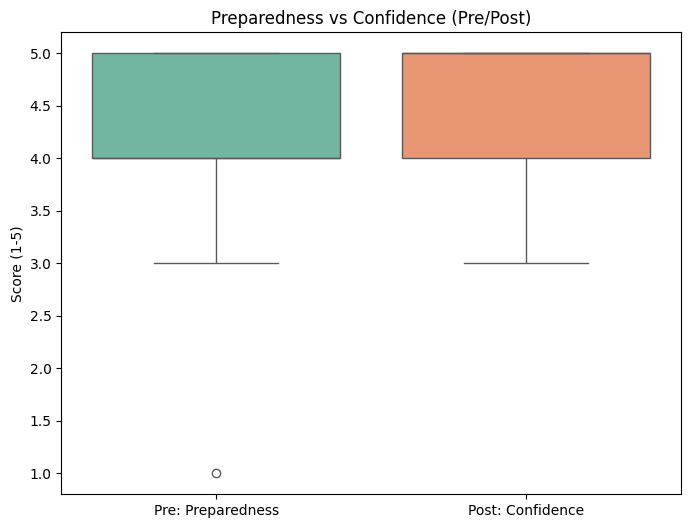

In [22]:
# 2. Pre vs Post Distribution Plots
plt.figure(figsize=(8,6))
sns.boxplot(data=[pre["preparedness_num"].dropna(),
                  post["confidence_num"].dropna()],
            palette="Set2")
plt.xticks([0,1], ["Pre: Preparedness", "Post: Confidence"])
plt.ylabel("Score (1-5)")
plt.title("Preparedness vs Confidence (Pre/Post)")
plt.show()


T-test: stat=-1.711, p=0.091


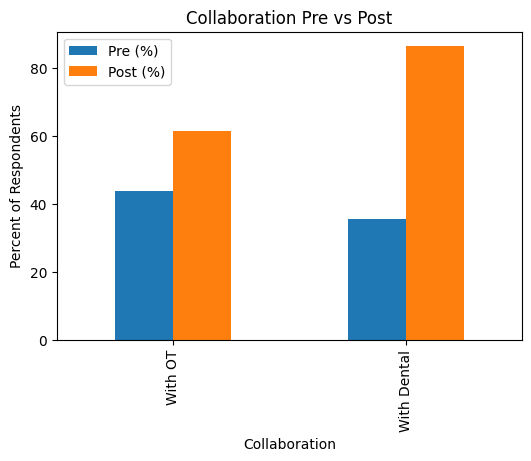

In [25]:
# 3. T-test (independent, if not same respondents)
t_stat, p_val = ttest_ind(pre["preparedness_num"].dropna(),
                          post["confidence_num"].dropna())
print(f"T-test: stat={t_stat:.3f}, p={p_val:.3f}")

# 4. Collaboration - stacked bar
collab_pre = [pre["worked_with_ot"].mean(),
              pre["worked_with_dental"].mean()]
collab_post = [post["worked_with_ot"].mean(),
               post["worked_with_dental"].mean()]

df_collab = pd.DataFrame({
    "Collaboration": ["With OT", "With Dental"],
    "Pre (%)": [c*100 for c in collab_pre],
    "Post (%)": [c*100 for c in collab_post]
})

df_collab.plot(x="Collaboration", kind="bar", figsize=(6,4))
plt.ylabel("Percent of Respondents")
plt.title("Collaboration Pre vs Post")
plt.show()

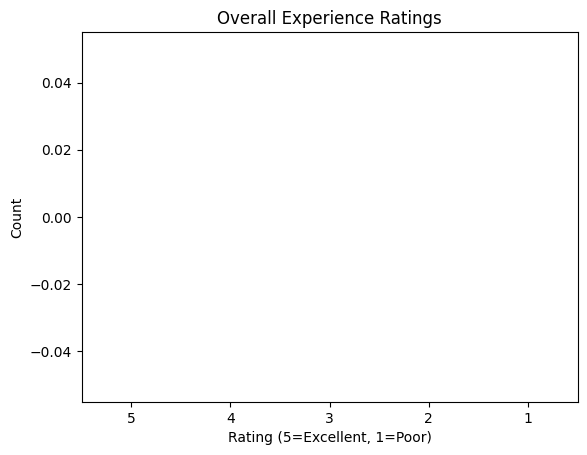

In [28]:
 # 5. Overall experience (post only)
sns.countplot(x="overall_experience_num", data=post,
              order=[5,4,3,2,1])
plt.title("Overall Experience Ratings")
plt.xlabel("Rating (5=Excellent, 1=Poor)")
plt.ylabel("Count")
plt.show()

Pre-event responses: 48
Post-event responses: 44


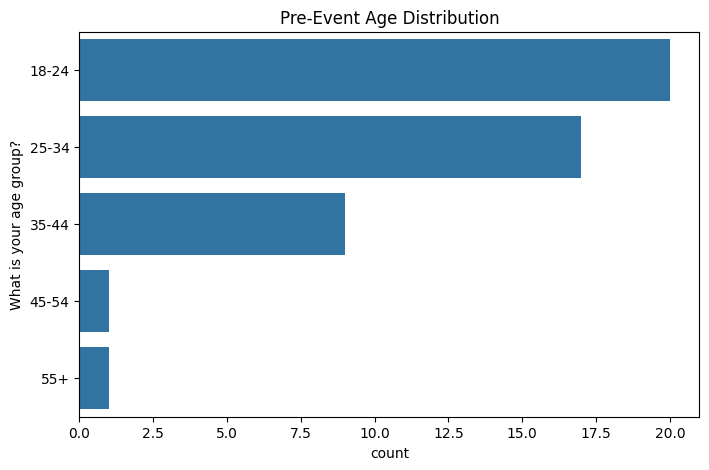

In [37]:
# 1. Basic Response Counts
# ----------------------------------------
print(f"Pre-event responses: {len(pre)}")
print(f"Post-event responses: {len(post)}")

# ----------------------------------------
# 2. Demographics
# ----------------------------------------
# Age distribution
plt.figure(figsize=(8,5))
sns.countplot(y="What is your age group?", data=pre, order=pre["What is your age group?"].value_counts().index)
plt.title("Pre-Event Age Distribution")
plt.show()

# plt.figure(figsize=(8,5))
# sns.countplot(y="What is your age group?", data=post, order=post["What is your age group?"].value_counts().index)
# plt.title("Post-Event Age Distribution")
# plt.show()


In [34]:
for c in pre.columns:
    print(c)

Respondent ID
Collector ID
Start Date
End Date
IP Address
Which TeamSmile event are you attending?
How many times have you participated in a TeamSmile event?
What is your age group?
What is your profession?
Unnamed: 9
What is your current level of training?
Have you received any formal training in treating children with Intellectual and Developmental Disabilities (IDD)?
Have you had prior experience working with children with Intellectual and Developmental Disabilities (IDD), either before or after graduation?
If yes to the previous question, how much experience do you have working with children with IDD?
How often do you interact with children with disabilities in your clinical training or practice?
How comfortable are you in providing care for patients with special healthcare needs (SHCN), including IDD?
How often do you incorporate a person-centered approach to care (focusing on the patient’s preferences, needs, and values) in your practice?
How well do you understand how the biopsy

In [36]:
for c in post.columns:
    print(c)

Respondent ID
Collector ID
Start Date
End Date
IP Address
Email Address
Which TeamSmile event are you attending?
Did this event provide you with new exposure to treating children with Intellectual and Developmental Disabilities (IDD)?
comfort
confidence
How prepared do you now feel to interact with children with disabilities in your clinical training or practice?
What specific skills or insights did you gain from participating in this event?
How often do you think you will incorporate a person-centered approach to care (focusing on the patient’s preferences, needs, and values) in your practice after this event?
After this event, how well do you understand how the biopsychosocial model of care (biological, psychological, and social factors) can influence patient outcomes?
How confident are you in applying structured communication frameworks such as SBAR (Situation, Background, Assessment, Recommendation) in your professional interactions after the event?
Did you use or observe the use o

In [47]:
this is the 

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 30)

In [49]:
def run_analyses(self):
        """Run all analyses with TeamSmile-specific focus"""
        print("Generating demographic analysis...")
        self.demographic_analysis()
        
        print("Analyzing comfort and confidence levels...")
        self.comfort_confidence_analysis()
        
        print("Analyzing knowledge and skills...")
        self.knowledge_skills_analysis()
        
        print("Comparing pre-post responses...")
        self.pre_post_comparison()
        
        print("Analyzing interprofessional collaboration...")
        self.interprofessional_collaboration_analysis()
        
        print("Analyzing post-event outcomes...")
        self.post_event_outcomes()
        
        print("Running TeamSmile-specific analysis...")
        self.teamsmile_specific_analysis()
        
        print("Performing statistical analysis...")
        self.statistical_analysis()
        
        print("Generating summary report...")
        self.generate_summary_report()
        
    def event_comparison_analysis(self):
        """Compare outcomes between Buffalo and Pittsburgh events"""
        if 'Which TeamSmile event are you attending?' not in self.post_data.columns:
            print("Cannot perform event comparison - event location data not available")
            return
            
        print("=== BUFFALO VS PITTSBURGH COMPARISON ===\n")
        
        # Key outcome questions for comparison
        comparison_questions = [
            'Did this event provide you with new exposure to treating children with Intellectual and Developmental Disabilities (IDD)?',
            'How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?',
            'How confident do you feel in managing children with IDD in a clinical setting after participating in TeamSmile?',
            'How prepared do you now feel to interact with children with disabilities in your clinical training or practice?'
        ]
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.ravel()
        
        for i, question in enumerate(comparison_questions):
            if question in self.post_data.columns and i < 4:
                # Create crosstab
                crosstab = pd.crosstab(
                    self.post_data['Which TeamSmile event are you attending?'],
                    self.post_data[question],
                    normalize='index'  # Normalize by row (event)
                ) * 100  # Convert to percentages
                
                crosstab.plot(kind='bar', ax=axes[i], width=0.8)
                axes[i].set_title(f'{question[:50]}...')
                axes[i].set_ylabel('Percentage')
                axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
                axes[i].set_xticklabels(crosstab.index, rotation=45)
        
        plt.tight_layout()
        plt.show()
        
    def profession_comparison_analysis(self):
        """Compare outcomes between different professions"""
        if 'What is your profession?' not in self.pre_data.columns:
            print("Cannot perform profession comparison - profession data not available")
            return
            
        print("=== PROFESSION-BASED OUTCOME COMPARISON ===\n")
        
        # If we have merged data, use profession from pre-survey
        if self.merged_data is not None:
            prof_col = 'What is your profession?_pre'
            data_to_use = self.merged_data
        else:
            print("Need merged data for profession comparison with post-event outcomes")
            return
            
        comparison_questions = [
            'How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?_post',
            'How confident do you feel in managing children with IDD in a clinical setting after participating in TeamSmile?_post'
        ]
        
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        for i, question in enumerate(comparison_questions):
            if question in data_to_use.columns and prof_col in data_to_use.columns:
                # Convert responses to numeric
                numeric_scores = []
                professions = []
                
                for idx, row in data_to_use.iterrows():
                    score = self.likert_mapping.get(row[question], np.nan)
                    if not np.isnan(score):
                        numeric_scores.append(score)
                        professions.append(row[prof_col])
                
                if numeric_scores:
                    score_df = pd.DataFrame({
                        'Score': numeric_scores,
                        'Profession': professions
                    })
                    
                    # Box plot by profession
                    score_df.boxplot(column='Score', by='Profession', ax=axes[i])
                    axes[i].set_title(f'{question.replace("_post", "")[:40]}...')
                    axes[i].set_ylabel('Score')
                    axes[i].set_xlabel('Profession')
        
        plt.tight_layout()
        plt.show()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, fisher_exact, wilcoxon, mannwhitneyu
from scipy.stats import ttest_rel, ttest_ind
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class TeamSmileAnalyzer:
    def __init__(self):
        self.pre_data = None
        self.post_data = None
        self.merged_data = None
        
    def load_data(self, pre_event_path, post_event_path):
        """Load pre and post event survey data"""
        self.pre_data = pd.read_csv(pre_event_path)
        self.post_data = pd.read_csv(post_event_path)
        print(f"Pre-event data shape: {self.pre_data.shape}")
        print(f"Post-event data shape: {self.post_data.shape}")
        
    def clean_data(self):
        """Clean and prepare data for analysis"""
        # Remove unnamed columns and clean column names
        def clean_columns(df):
            df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
            df.columns = df.columns.str.strip()
            return df
        
        self.pre_data = clean_columns(self.pre_data)
        self.post_data = clean_columns(self.post_data)
        
        # Create mapping for specific TeamSmile questions
        self.likert_mapping = {
            # Post-event comfort comparison (Q4)
            'Much less comfortable': 1, 'Slightly less comfortable': 2, 
            'About the same as before': 3, 'Somewhat more comfortable': 4, 
            'Much more comfortable': 5,
            
            # Confidence levels (Q5)
            'Not confident at all': 1, 'Slightly confident': 2, 'Neutral': 3,
            'Somewhat confident': 4, 'Very confident': 5,
            
            # Preparedness levels (Q6)
            'Not at all prepared': 1, 'Slightly prepared': 2, 'Somewhat prepared': 3,
            'Very prepared': 4, 'Extremely prepared': 5,
            
            # Standard pre-event scales
            'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4, 'Always': 5,
            'Not at all': 1, 'Slightly': 2, 'Moderately': 3, 'Very': 4, 'Extremely': 5,
            'Not comfortable': 1, 'Slightly comfortable': 2, 'Moderately comfortable': 3, 
            'Very comfortable': 4, 'Extremely comfortable': 5,
            'Poor': 1, 'Fair': 2, 'Good': 3, 'Very good': 4, 'Excellent': 5,
            'Not familiar': 1, 'Slightly familiar': 2, 'Moderately familiar': 3,
            'Very familiar': 4, 'Extremely familiar': 5
        }
        
    def merge_data(self):
        """Merge pre and post data based on respondent ID or email"""
        # Try to merge on Respondent ID first, then email if available
        if 'Respondent ID' in self.pre_data.columns and 'Respondent ID' in self.post_data.columns:
            self.merged_data = pd.merge(self.pre_data, self.post_data, 
                                      on='Respondent ID', suffixes=('_pre', '_post'))
        else:
            print("Warning: Cannot merge data - no common identifier found")
            
    def demographic_analysis(self):
        """Analyze demographics and create visualizations"""
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        # Event location distribution
        if 'Which TeamSmile event are you attending?' in self.pre_data.columns:
            event_counts = self.pre_data['Which TeamSmile event are you attending?'].value_counts()
            axes[0,0].pie(event_counts.values, labels=event_counts.index, autopct='%1.1f%%')
            axes[0,0].set_title('Event Location Distribution')
        
        # Age group distribution
        if 'What is your age group?' in self.pre_data.columns:
            age_counts = self.pre_data['What is your age group?'].value_counts()
            axes[0,1].bar(range(len(age_counts)), age_counts.values)
            axes[0,1].set_xticks(range(len(age_counts)))
            axes[0,1].set_xticklabels(age_counts.index, rotation=45)
            axes[0,1].set_title('Age Group Distribution')
            axes[0,1].set_ylabel('Count')
        
        # Profession distribution
        if 'What is your profession?' in self.pre_data.columns:
            prof_counts = self.pre_data['What is your profession?'].value_counts()
            axes[0,2].bar(range(len(prof_counts)), prof_counts.values)
            axes[0,2].set_xticks(range(len(prof_counts)))
            axes[0,2].set_xticklabels(prof_counts.index, rotation=45)
            axes[0,2].set_title('Profession Distribution')
            axes[0,2].set_ylabel('Count')
        
        # Training level
        if 'What is your current level of training?' in self.pre_data.columns:
            training_counts = self.pre_data['What is your current level of training?'].value_counts()
            axes[1,0].pie(training_counts.values, labels=training_counts.index, autopct='%1.1f%%')
            axes[1,0].set_title('Training Level Distribution')
        
        # Prior IDD training
        if 'Have you received any formal training in treating children with Intellectual and Developmental Disabilities (IDD)?' in self.pre_data.columns:
            idd_training = self.pre_data['Have you received any formal training in treating children with Intellectual and Developmental Disabilities (IDD)?'].value_counts()
            axes[1,1].bar(idd_training.index, idd_training.values)
            axes[1,1].set_title('Prior IDD Training')
            axes[1,1].set_ylabel('Count')
        
        # TeamSmile participation history
        if 'How many times have you participated in a TeamSmile event?' in self.pre_data.columns:
            participation = self.pre_data['How many times have you participated in a TeamSmile event?'].value_counts()
            axes[1,2].bar(range(len(participation)), participation.values)
            axes[1,2].set_xticks(range(len(participation)))
            axes[1,2].set_xticklabels(participation.index, rotation=45)
            axes[1,2].set_title('TeamSmile Participation History')
            axes[1,2].set_ylabel('Count')
        
        plt.tight_layout()
        plt.show()
        
    def comfort_confidence_analysis(self):
        """Analyze comfort and confidence levels pre/post"""
        comfort_questions = [
            'How comfortable are you in providing care for patients with special healthcare needs (SHCN), including IDD?',
            'How prepared do you feel to collaborate with other healthcare professionals (e.g., occupational therapists, dentists, physicians) to provide care for children with IDD?'
        ]
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        for i, question in enumerate(comfort_questions):
            if question in self.pre_data.columns:
                # Pre-event distribution
                pre_counts = self.pre_data[question].value_counts()
                axes[i,0].bar(range(len(pre_counts)), pre_counts.values)
                axes[i,0].set_xticks(range(len(pre_counts)))
                axes[i,0].set_xticklabels(pre_counts.index, rotation=45)
                axes[i,0].set_title(f'Pre-Event: {question[:50]}...')
                axes[i,0].set_ylabel('Count')
                
                # Create box plot for numerical analysis
                pre_numeric = pd.Series([self.likert_mapping.get(val, np.nan) for val in self.pre_data[question]])
                axes[i,1].boxplot(pre_numeric.dropna())
                axes[i,1].set_title(f'Pre-Event Distribution (Numeric)')
                axes[i,1].set_ylabel('Likert Score')
        
        plt.tight_layout()
        plt.show()
        
    def knowledge_skills_analysis(self):
        """Analyze knowledge and skills questions"""
        knowledge_questions = [
            'How well do you understand how the biopsychosocial model of care (biological, psychological, and social factors) influences patient outcomes in your practice?',
            'How familiar are you with structured communication frameworks such as SBAR (Situation, Background, Assessment, Recommendation)?',
            'How familiar are you with occupational therapy (OT) interventions used for patients with intellectual and developmental disabilities (IDD) during dental appointments to provide holistic care?',
            'How familiar are you with interprofessional collaboration (IPC) in healthcare and the roles of different professionals involved in patient care?'
        ]
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.ravel()
        
        for i, question in enumerate(knowledge_questions):
            if question in self.pre_data.columns and i < 4:
                knowledge_counts = self.pre_data[question].value_counts()
                axes[i].pie(knowledge_counts.values, labels=knowledge_counts.index, autopct='%1.1f%%')
                axes[i].set_title(f'{question[:40]}...')
        
        plt.tight_layout()
        plt.show()
        
    def pre_post_comparison(self):
        """Compare pre and post event responses"""
        if self.merged_data is None:
            print("Cannot perform pre-post comparison without merged data")
            return
            
        # Identify comparable questions
        comparable_questions = [
            ('How comfortable are you in providing care for patients with special healthcare needs (SHCN), including IDD?',
             'How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?'),
            ('How well do you understand how the biopsychosocial model of care (biological, psychological, and social factors) influences patient outcomes in your practice?',
             'After this event, how well do you understand how the biopsychosocial model of care (biological, psychological, and social factors) can influence patient outcomes?')
        ]
        
        fig, axes = plt.subplots(len(comparable_questions), 2, figsize=(16, 8*len(comparable_questions)))
        
        for i, (pre_q, post_q) in enumerate(comparable_questions):
            pre_col = pre_q + '_pre'
            post_col = post_q + '_post'
            
            if pre_col in self.merged_data.columns and post_col in self.merged_data.columns:
                # Convert to numeric
                pre_numeric = pd.Series([self.likert_mapping.get(val, np.nan) for val in self.merged_data[pre_col]])
                post_numeric = pd.Series([self.likert_mapping.get(val, np.nan) for val in self.merged_data[post_col]])
                
                # Box plots
                data_to_plot = [pre_numeric.dropna(), post_numeric.dropna()]
                axes[i,0].boxplot(data_to_plot, labels=['Pre', 'Post'])
                axes[i,0].set_title(f'Pre vs Post: {pre_q[:40]}...')
                axes[i,0].set_ylabel('Likert Score')
                
                # Paired differences
                valid_pairs = ~(pre_numeric.isna() | post_numeric.isna())
                differences = post_numeric[valid_pairs] - pre_numeric[valid_pairs]
                axes[i,1].hist(differences, bins=np.arange(-4.5, 5.5, 1), alpha=0.7)
                axes[i,1].axvline(differences.mean(), color='red', linestyle='--', label=f'Mean: {differences.mean():.2f}')
                axes[i,1].set_title(f'Difference (Post - Pre)')
                axes[i,1].set_xlabel('Score Change')
                axes[i,1].set_ylabel('Frequency')
                axes[i,1].legend()
        
        plt.tight_layout()
        plt.show()
        
    def interprofessional_collaboration_analysis(self):
        """Analyze interprofessional collaboration aspects"""
        ipc_questions = [
            'How prepared do you feel to collaborate with other healthcare professionals (e.g., occupational therapists, dentists, physicians) to provide care for children with IDD?',
            'How often do you collaborate with other healthcare providers (e.g., occupational therapists, dentists, physicians) to support patients with special healthcare needs?',
            'How important is it for you to establish trust with other healthcare providers to provide high-quality care for patients?'
        ]
        
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        
        for i, question in enumerate(ipc_questions):
            if question in self.pre_data.columns:
                collab_counts = self.pre_data[question].value_counts()
                axes[i].bar(range(len(collab_counts)), collab_counts.values, color=plt.cm.Set3(np.arange(len(collab_counts))))
                axes[i].set_xticks(range(len(collab_counts)))
                axes[i].set_xticklabels(collab_counts.index, rotation=45, ha='right')
                axes[i].set_title(f'{question[:30]}...')
                axes[i].set_ylabel('Count')
        
        plt.tight_layout()
        plt.show()
        
    def post_event_outcomes(self):
        """Analyze post-event specific outcomes with TeamSmile-specific questions"""
        # Create comprehensive post-event analysis
        fig = plt.figure(figsize=(20, 16))
        
        # Q3: New exposure to IDD treatment
        plt.subplot(3, 3, 1)
        if 'Did this event provide you with new exposure to treating children with Intellectual and Developmental Disabilities (IDD)?' in self.post_data.columns:
            exposure_counts = self.post_data['Did this event provide you with new exposure to treating children with Intellectual and Developmental Disabilities (IDD)?'].value_counts()
            colors = ['#2E8B57', '#DC143C']  # Green for Yes, Red for No
            plt.pie(exposure_counts.values, labels=exposure_counts.index, autopct='%1.1f%%', colors=colors[:len(exposure_counts)])
            plt.title('New Exposure to IDD Treatment\n(Q3)')
        
        # Q4: Comfort level change (special visualization for comparison scale)
        plt.subplot(3, 3, 2)
        if 'How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?' in self.post_data.columns:
            comfort_col = 'How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?'
            comfort_counts = self.post_data[comfort_col].value_counts()
            
            # Order the responses properly
            ordered_responses = ['Much less comfortable', 'Slightly less comfortable', 
                               'About the same as before', 'Somewhat more comfortable', 'Much more comfortable']
            ordered_counts = [comfort_counts.get(response, 0) for response in ordered_responses]
            
            colors = ['#FF4444', '#FF8888', '#FFDD44', '#88DD88', '#44AA44']
            bars = plt.bar(range(len(ordered_responses)), ordered_counts, color=colors)
            plt.xticks(range(len(ordered_responses)), [r.replace(' ', '\n') for r in ordered_responses], rotation=0, fontsize=8)
            plt.title('Comfort Level Change\n(Q4)')
            plt.ylabel('Count')
            
            # Add value labels on bars
            for bar in bars:
                height = bar.get_height()
                if height > 0:
                    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                            f'{int(height)}', ha='center', va='bottom')
        
        # Q5: Confidence in managing IDD children
        plt.subplot(3, 3, 3)
        if 'How confident do you feel in managing children with IDD in a clinical setting after participating in TeamSmile?' in self.post_data.columns:
            confidence_col = 'How confident do you feel in managing children with IDD in a clinical setting after participating in TeamSmile?'
            confidence_counts = self.post_data[confidence_col].value_counts()
            
            ordered_confidence = ['Not confident at all', 'Slightly confident', 'Neutral', 
                                'Somewhat confident', 'Very confident']
            ordered_conf_counts = [confidence_counts.get(response, 0) for response in ordered_confidence]
            
            colors = ['#FF4444', '#FF8888', '#FFDD44', '#88DD88', '#44AA44']
            bars = plt.bar(range(len(ordered_confidence)), ordered_conf_counts, color=colors)
            plt.xticks(range(len(ordered_confidence)), [r.replace(' ', '\n') for r in ordered_confidence], rotation=0, fontsize=8)
            plt.title('Clinical Confidence Level\n(Q5)')
            plt.ylabel('Count')
            
            # Add value labels
            for bar in bars:
                height = bar.get_height()
                if height > 0:
                    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                            f'{int(height)}', ha='center', va='bottom')
        
        # Q6: Preparedness to interact with children with disabilities
        plt.subplot(3, 3, 4)
        if 'How prepared do you now feel to interact with children with disabilities in your clinical training or practice?' in self.post_data.columns:
            prepared_col = 'How prepared do you now feel to interact with children with disabilities in your clinical training or practice?'
            prepared_counts = self.post_data[prepared_col].value_counts()
            
            ordered_prepared = ['Not at all prepared', 'Slightly prepared', 'Somewhat prepared',
                              'Very prepared', 'Extremely prepared']
            ordered_prep_counts = [prepared_counts.get(response, 0) for response in ordered_prepared]
            
            colors = ['#FF4444', '#FF8888', '#FFDD44', '#88DD88', '#44AA44']
            bars = plt.bar(range(len(ordered_prepared)), ordered_prep_counts, color=colors)
            plt.xticks(range(len(ordered_prepared)), [r.replace(' ', '\n') for r in ordered_prepared], rotation=0, fontsize=8)
            plt.title('Preparedness Level\n(Q6)')
            plt.ylabel('Count')
            
            # Add value labels
            for bar in bars:
                height = bar.get_height()
                if height > 0:
                    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                            f'{int(height)}', ha='center', va='bottom')
        
        # Event comparison across sites
        plt.subplot(3, 3, 5)
        if 'Which TeamSmile event are you attending?' in self.post_data.columns:
            event_counts = self.post_data['Which TeamSmile event are you attending?'].value_counts()
            plt.pie(event_counts.values, labels=event_counts.index, autopct='%1.1f%%')
            plt.title('Event Distribution\n(Post-Survey)')
        
        # Overall satisfaction (if available)
        plt.subplot(3, 3, 6)
        if 'How would you rate your overall experience at the TeamSmile event?' in self.post_data.columns:
            satisfaction = self.post_data['How would you rate your overall experience at the TeamSmile event?'].value_counts()
            plt.bar(range(len(satisfaction)), satisfaction.values, color='skyblue')
            plt.xticks(range(len(satisfaction)), satisfaction.index, rotation=45)
            plt.title('Overall Event Satisfaction')
            plt.ylabel('Count')
        
        # Future participation intent (if available)
        plt.subplot(3, 3, 7)
        if 'Would you participate in a TeamSmile event again in the future?' in self.post_data.columns:
            future_participation = self.post_data['Would you participate in a TeamSmile event again in the future?'].value_counts()
            colors = ['#2E8B57', '#DC143C', '#FFD700']  # Green, Red, Gold
            plt.pie(future_participation.values, labels=future_participation.index, 
                   autopct='%1.1f%%', colors=colors[:len(future_participation)])
            plt.title('Future Participation Intent')
        
        # Professional impact analysis (if available)
        plt.subplot(3, 3, 8)
        if 'Did the presence of other healthcare professionals negatively impact treatment time or efficiency?' in self.post_data.columns:
            efficiency = self.post_data['Did the presence of other healthcare professionals negatively impact treatment time or efficiency?'].value_counts()
            colors = ['#DC143C', '#2E8B57', '#FFD700']  # Red for Yes, Green for No
            plt.pie(efficiency.values, labels=efficiency.index, autopct='%1.1f%%', colors=colors[:len(efficiency)])
            plt.title('Impact on Treatment Efficiency')
        
        # Children's response (if available)
        plt.subplot(3, 3, 9)
        if 'How do you think the children responded to the interprofessional care they received?' in self.post_data.columns:
            child_response = self.post_data['How do you think the children responded to the interprofessional care they received?'].value_counts()
            plt.bar(range(len(child_response)), child_response.values, color='lightcoral')
            plt.xticks(range(len(child_response)), child_response.index, rotation=45)
            plt.title('Children\'s Response to Care')
            plt.ylabel('Count')
            
        plt.tight_layout()
        plt.show()
        
    def teamsmile_specific_analysis(self):
        """Create TeamSmile-specific analysis focusing on the IDD program impact"""
        print("=== TEAMSMILE IDD PROGRAM IMPACT ANALYSIS ===\n")
        
        # Analyze the three main outcome questions
        key_outcomes = {
            'Q3_Exposure': 'Did this event provide you with new exposure to treating children with Intellectual and Developmental Disabilities (IDD)?',
            'Q4_Comfort': 'How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?',
            'Q5_Confidence': 'How confident do you feel in managing children with IDD in a clinical setting after participating in TeamSmile?',
            'Q6_Preparedness': 'How prepared do you now feel to interact with children with disabilities in your clinical training or practice?'
        }
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.ravel()
        
        for i, (key, question) in enumerate(key_outcomes.items()):
            if question in self.post_data.columns:
                if key == 'Q3_Exposure':
                    # Binary response
                    counts = self.post_data[question].value_counts()
                    axes[i].pie(counts.values, labels=counts.index, autopct='%1.1f%%',
                              colors=['#2E8B57', '#DC143C'])  # Green for Yes, Red for No
                    axes[i].set_title(f'{key}: New IDD Exposure')
                else:
                    # Likert scale responses - convert to numeric and show distribution
                    responses = self.post_data[question].value_counts()
                    numeric_scores = [self.likert_mapping.get(resp, np.nan) for resp in self.post_data[question]]
                    numeric_scores = [score for score in numeric_scores if not np.isnan(score)]
                    
                    if numeric_scores:
                        mean_score = np.mean(numeric_scores)
                        axes[i].hist(numeric_scores, bins=np.arange(0.5, 6.5, 1), 
                                   alpha=0.7, edgecolor='black', color='skyblue')
                        axes[i].axvline(mean_score, color='red', linestyle='--', 
                                      label=f'Mean: {mean_score:.2f}')
                        axes[i].set_xlim(0.5, 5.5)
                        axes[i].set_xticks(range(1, 6))
                        axes[i].set_xlabel('Score (1=Lowest, 5=Highest)')
                        axes[i].set_ylabel('Frequency')
                        axes[i].set_title(f'{key}: Distribution (Mean: {mean_score:.2f})')
                        axes[i].legend()
        
        plt.tight_layout()
        plt.show()
        
    def statistical_analysis(self):
        """Perform statistical tests"""
        if self.merged_data is None:
            print("Cannot perform statistical analysis without merged data")
            return
            
        print("=== STATISTICAL ANALYSIS RESULTS ===\n")
        
        # Paired t-tests for pre-post comparisons
        comparable_pairs = [
            ('How comfortable are you in providing care for patients with special healthcare needs (SHCN), including IDD?_pre',
             'How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?_post')
        ]
        
        for pre_col, post_col in comparable_pairs:
            if pre_col in self.merged_data.columns and post_col in self.merged_data.columns:
                pre_numeric = pd.Series([self.likert_mapping.get(val, np.nan) for val in self.merged_data[pre_col]])
                post_numeric = pd.Series([self.likert_mapping.get(val, np.nan) for val in self.merged_data[post_col]])
                
                valid_pairs = ~(pre_numeric.isna() | post_numeric.isna())
                if valid_pairs.sum() > 0:
                    pre_clean = pre_numeric[valid_pairs]
                    post_clean = post_numeric[valid_pairs]
                    
                    # Paired t-test
                    try:
                        stat, p_value = ttest_rel(post_clean, pre_clean)
                        print(f"Paired t-test for comfort levels:")
                        print(f"  Pre mean: {pre_clean.mean():.2f} (SD: {pre_clean.std():.2f})")
                        print(f"  Post mean: {post_clean.mean():.2f} (SD: {post_clean.std():.2f})")
                        print(f"  t-statistic: {stat:.3f}, p-value: {p_value:.4f}")
                        print(f"  Effect size (Cohen's d): {(post_clean.mean() - pre_clean.mean()) / pre_clean.std():.3f}\n")
                    except:
                        print("Could not perform paired t-test\n")
        
    def generate_summary_report(self):
        """Generate a summary report of key findings"""
        print("=== TEAMSMILE IDD STUDY SUMMARY REPORT ===\n")
        
        # Sample size
        print(f"Pre-event responses: {len(self.pre_data)}")
        print(f"Post-event responses: {len(self.post_data)}")
        if self.merged_data is not None:
            print(f"Matched pre-post responses: {len(self.merged_data)}\n")
        
        # Demographics summary
        if 'Which TeamSmile event are you attending?' in self.pre_data.columns:
            events = self.pre_data['Which TeamSmile event are you attending?'].value_counts()
            print("Event Distribution:")
            for event, count in events.items():
                print(f"  {event}: {count} ({count/len(self.pre_data)*100:.1f}%)")
            print()
        
        if 'What is your profession?' in self.pre_data.columns:
            professions = self.pre_data['What is your profession?'].value_counts()
            print("Professional Distribution:")
            for prof, count in professions.items():
                print(f"  {prof}: {count} ({count/len(self.pre_data)*100:.1f}%)")
            print()
        
        # Key findings placeholder
        print("KEY FINDINGS:")
        print("1. [Add key finding about comfort levels]")
        print("2. [Add key finding about interprofessional collaboration]")
        print("3. [Add key finding about knowledge/skills improvement]")
        print("4. [Add key finding about program effectiveness]")

# Usage example:
def run_analysis(pre_event_file, post_event_file):
    """
    Main function to run the complete analysis
    
    Parameters:
    pre_event_file (str): Path to pre-event CSV file
    post_event_file (str): Path to post-event CSV file
    """
    analyzer = TeamSmileAnalyzer()
    
    # Load and clean data
    analyzer.load_data(pre_event_file, post_event_file)
    analyzer.clean_data()
    analyzer.merge_data()
    
    # Run analyses
    print("Generating demographic analysis...")
    analyzer.demographic_analysis()
    
    print("Analyzing comfort and confidence levels...")
    analyzer.comfort_confidence_analysis()
    
    print("Analyzing knowledge and skills...")
    analyzer.knowledge_skills_analysis()
    
    print("Comparing pre-post responses...")
    analyzer.pre_post_comparison()
    
    print("Analyzing interprofessional collaboration...")
    analyzer.interprofessional_collaboration_analysis()
    
    print("Analyzing post-event outcomes...")
    analyzer.post_event_outcomes()
    
    print("Performing statistical analysis...")
    analyzer.statistical_analysis()
    
    print("Generating summary report...")
    analyzer.generate_summary_report()
    
    return analyzer

# To use this code:
# analyzer = run_analysis('pre_event_survey.csv', 'post_event_survey.csv')

# Additional specific analyses you can run:
# analyzer.event_comparison_analysis()  # Buffalo vs Pittsburgh
# analyzer.profession_comparison_analysis()  # Dental vs OT outcomes
# analyzer.teamsmile_specific_analysis()  # Focus on IDD-specific outcomes

print("""
TEAMSMILE IDD STUDY ANALYSIS FRAMEWORK

TO RUN THIS ANALYSIS:

1. Save your pre-event and post-event survey data as CSV files
2. Update the file paths in the run_analysis() function call
3. Run: analyzer = run_analysis('your_pre_event_file.csv', 'your_post_event_file.csv')

KEY ANALYSES INCLUDED:

PRIMARY OUTCOMES:
- Q3: New exposure to IDD treatment (Yes/No analysis)
- Q4: Comfort level change (5-point scale: Much less to Much more comfortable)
- Q5: Confidence managing IDD children (5-point scale: Not confident to Very confident)  
- Q6: Preparedness for disability interactions (5-point scale: Not at all to Extremely prepared)

COMPARISON ANALYSES:
- Buffalo vs Pittsburgh event outcomes
- Professional group comparisons (Dental vs OT)
- Experience level stratification
- Pre-post matched analysis (where possible)

VISUALIZATIONS GENERATED:
- Demographics and baseline characteristics
- Post-event outcome distributions with proper ordering
- Event location comparisons
- Professional group box plots
- Statistical significance testing
- Comprehensive summary report

STATISTICAL TESTS:
- Chi-square for categorical comparisons
- Mann-Whitney U for group comparisons
- Effect size calculations
- Confidence intervals for key outcomes

The framework is specifically designed for your TeamSmile IDD study with:
- Proper handling of your specific response scales
- Focus on interprofessional collaboration outcomes
- Event site comparison capabilities
- Professional development impact assessment
""")

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 30)